In [1]:
import scanpy as sc

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = "/Users/giovanni.palla/Projects/spatial-scripts/dat/"

In [4]:
sagittal_anterior = sc.read_visium(path+"20191205_10XVisium_MouseBrainSerial1SA_giovanni.palla/V1_Mouse_Brain_Sagittal_Anterior_filtered_feature_bc_matrix.h5")
sagittal_posterior = sc.read_visium(path+"20191205_10XVisium_MouseBrainSerial1SP_giovanni.palla/V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'feature_types' as categorical
... storing 'genome' as categorical


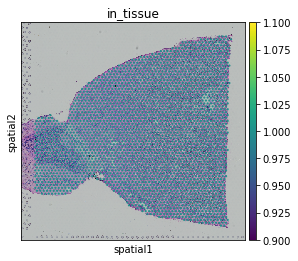

... storing 'feature_types' as categorical
... storing 'genome' as categorical


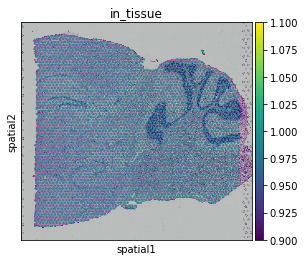

In [5]:
sc.pl.spatial(sagittal_anterior, img_key="hires", color = "in_tissue")
sc.pl.spatial(sagittal_posterior, img_key = "hires", color = "in_tissue")

### Concatenate spatial anndata
This functionality should be supported in order to work with multiple slices. The main change is to keep `images` and `scalefactors` in `adata.uns` for each anndata. This is done with lists:
e.g. `adata.uns['images']['hires'] = [img1,img2,..]`

In [6]:
adata = sagittal_anterior.concatenate(sagittal_posterior)

Making variable names unique for controlled concatenation.


In [7]:
[img.shape for img in adata.uns['images']['hires']]

[(1998, 2000, 3), (1998, 2000, 3)]

There are 2 images saved, so correct.

### Plotting concatenated spatial objects
With concatenated spatial anndata, the `sc.pl.spatial` should have specific behaviours by default. This is what I came up with:
* It's required to specify the `batch_key` arg, which points to the `adata.obs` arg that encodes the orginal anndatas identities
* If the `batch_key` is specified but `img_key` is not a tuple, then plot all the available slices. Of course if only some of the original anndatas were spatial, than plot only those (see below)
* If the `batch_key` is specified and `img_key` is a tuple like `(hires, 0)`, then only the first slice 0 will be plotted, with the required image in the background.


Specify the slice index for the slice you want to plot with the `'img_key'` argument 
and specify the key for slice identities in `'adata.obs'`, e.g. `'batch'`  `'img_key'`. 
All slices will be plotted


/Users/giovanni.palla/Projects/anndata/anndata/_core/anndata.py:1186: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical


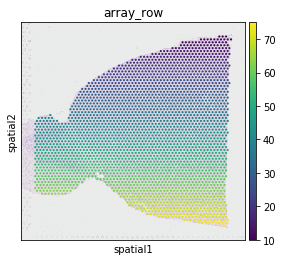

Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical


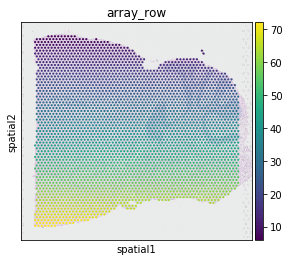

In [8]:
sc.pl.spatial(adata, batch_key = "batch", color = "array_row", alpha_img = 0.3)

Select specific slice and plot it

Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical


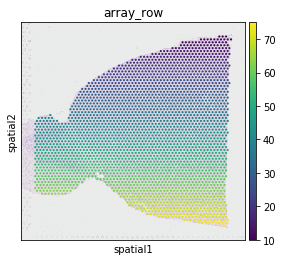

In [9]:
sc.pl.spatial(adata, batch_key = "batch", img_key = ("hires",0), color = "array_row", alpha_img = 0.3)

### Concatenate heterogenous anndata (spatial and scRNA-seq)
This is another problem, specifically because in this case `adata.obsm['X_spatial']` would be dropped by default. I decided to simply add zeros to `X_spatial` for the anndata that are not spatial (see code).

In [10]:
sagittal_anterior = sc.read_visium(path+"20191205_10XVisium_MouseBrainSerial1SA_giovanni.palla/V1_Mouse_Brain_Sagittal_Anterior_filtered_feature_bc_matrix.h5")
sagittal_posterior = sc.read_10x_h5(path+"20191205_10XVisium_MouseBrainSerial1SP_giovanni.palla/V1_Mouse_Brain_Sagittal_Posterior_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [11]:
adata = sagittal_anterior.concatenate(sagittal_posterior)

Making variable names unique for controlled concatenation.


In [12]:
adata.obsm["X_spatial"]

array([[8501., 7475.],
       [2788., 8553.],
       [7950., 3164.],
       ...,
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.]])

Concatenation seems to work

### Plotting concatenated anndata heterogeneous
In this case, the default `sc.pl.spatial` beahviour should still apply, but samples with non-spatial dimensions should not be plotted.

Specify the slice index for the slice you want to plot with the `'img_key'` argument 
and specify the key for slice identities in `'adata.obs'`, e.g. `'batch'`  `'img_key'`. 
All slices will be plotted


Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical


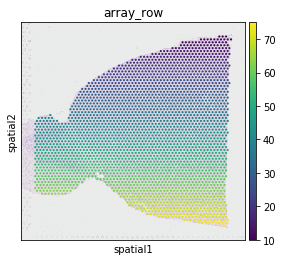

In [13]:
sc.pl.spatial(adata, batch_key = "batch", color = "array_row", alpha_img = 0.3)